# S&S & survey  `F15A`

In [1]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [2]:
import Script as sc

In [3]:
cd ~/Desktop/Tesis/F15A/trajectory

/home/luis/Desktop/Tesis/F15A/trajectory


In [4]:
ls

1.xml  2.xml  MetaDataFileInfo.txt


In [5]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [6]:
files = os.listdir()
files = [s for s in files if ".xml" in s]
files

['2.xml', '1.xml']

In [7]:
for file in files:
    sc.read_xml(file)

File :  2.xml

Wellbore name: 15/9-F-15A
Wellbore section: 12.25in section - Actual Traj
Start date: 2009-01-22T06:53:36.000Z
Final md : 2892.3968568 [m]
Surveys: 69 


File :  1.xml

Wellbore name: 15/9-F-15A
Wellbore section: 8.5in. Section - Actual Traj
Start date: 2009-02-13T17:10:08.000Z
Final md : 3211.7848896 [m]
Surveys: 80 




The file `1.xml`has the more depth in its final survey, indicating this should be the one used and the main whole trajectory

In [9]:
traj_wellbore = sc.read_xml(files[1])

File :  1.xml

Wellbore name: 15/9-F-15A
Wellbore section: 8.5in. Section - Actual Traj
Start date: 2009-02-13T17:10:08.000Z
Final md : 3211.7848896 [m]
Surveys: 80 




In [10]:
traj_wellbore

md          tvd      dispNs      dispEw   incl     azi       dls  \
0      0.000000     0.000000   -3.169920    3.529889   0.00    0.00  0.000000   
1    153.400049   153.399744   -3.226312    3.337170   0.15  253.69  0.000978   
2    234.200090   234.199481   -3.419731    3.346004   0.28  146.02  0.004400   
3    274.600111   274.597673   -3.700098    3.591473   0.78  136.21  0.012533   
4    315.000132   314.989769   -4.217527    4.185737   1.46  128.29  0.017221   
..          ...          ...         ...         ...    ...     ...       ...   
75  3078.271822  2900.422241 -696.798706 -208.022946  19.82  259.28  0.027352   
76  3118.276822  2937.799255 -699.859884 -221.942653  21.94  256.07  0.060200   
77  3158.539987  2975.092145 -703.496733 -236.677705  22.35  256.20  0.010256   
78  3199.024742  3012.678557 -707.091999 -251.282769  21.27  256.14  0.026683   
79  3211.784890  3024.581302 -708.216067 -255.742023  20.98  255.56  0.028015   

        neg_tvd  
0     -0.000000  
1   -153.399744  
2   -234.199481  
3   -274.597673  
4   -314.989769  
..          ...  
75 -2900.422241  
76 -2937.799255  
77 -2975.092145  
78 -3012.678557  
79 -3024.581302  

[80 rows x 8 columns]

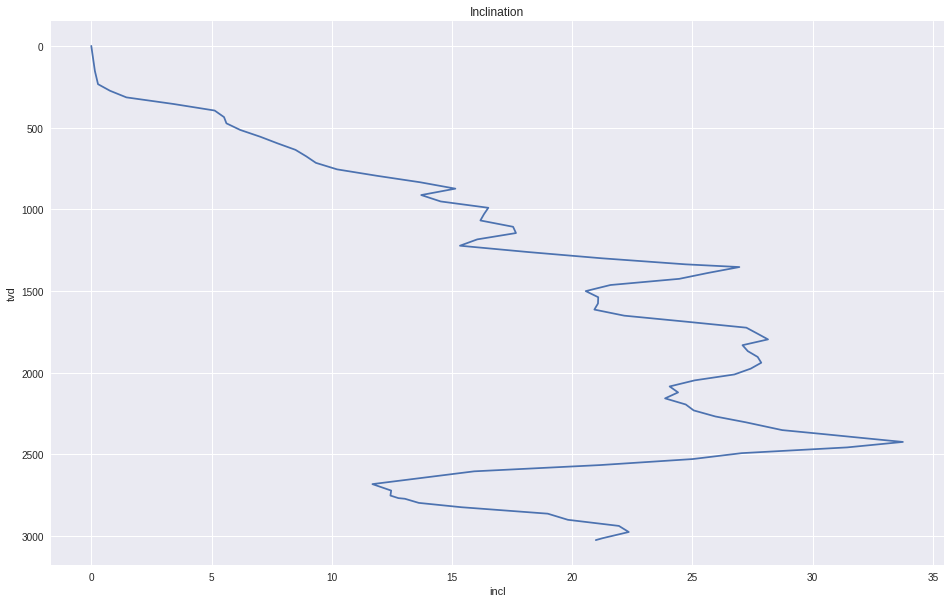

In [11]:
sc.plts_traj(traj_wellbore,"incl","tvd","Inclination","invert")

In [13]:
# Plot trajectory with inclination as point colors
x = traj_wellbore["dispEw"].values
y = traj_wellbore["dispNs"].values
z = traj_wellbore["tvd"].values

fig = px.scatter_3d(traj_wellbore, x = "dispEw", y = "dispNs", z = "tvd",
                    color = "dls")

fig.update_scenes(zaxis_autorange = "reversed")
fig.show()

# MWD Data

In [14]:
f_f15A = "/home/luis/Desktop/Tesis/F15A/CSVs/WellboreF15A.csv"

In [15]:
df = pd.read_csv(f_f15A)

In [16]:
df

DEPT     ROP5       GR     BPOS    BVEL     SWOB      TQA    RPM  \
0      1381.0034   3.4940  36.0000  25.0130  0.0010   0.6240   7.5400   80.0   
1      1381.0164   3.4940  36.0000  25.0000  0.0010   0.6040   7.5400   80.0   
2      1381.0339   3.4940  43.8910  24.9830  0.0010   0.5920   6.9700   80.0   
3      1381.0464   3.4940  43.8910  24.9700  0.0010   0.6850   7.0620   80.0   
4      1381.0597   3.9790  43.8910  24.9570  0.0010   0.5490   7.7870   80.0   
...          ...      ...      ...      ...     ...      ...      ...    ...   
54580  4095.3297  37.6749  72.0583  17.9498  0.0000  12.4974  25.7284  160.0   
54581  4095.3300  37.6749  72.0583  17.9495  0.0000  12.3539  26.0694  159.0   
54582  4095.3300  37.6749  95.9469  17.9495  0.0000  12.0969  24.8705  144.0   
54583  4095.2178  37.6749  95.9469  18.0616 -0.0006  10.9034  22.8788   80.0   
54584  4095.2181  37.6749  95.9469  18.0612  0.0000  11.1145  22.8788   80.0   

       Stick_RT       TFLO      SPPA     ECD      HKLD             DateTime  \
0          57.0  4010.0120  188.0610  1.4310  124.2190  2008-12-11 15:01:37   
1          57.0  4010.0120  188.0610  1.4310  124.2390  2008-12-11 15:01:47   
2          12.0  4010.0120  188.8070  1.4320  124.2510  2008-12-11 15:01:57   
3          12.0  4010.0120  188.7640  1.4310  124.1590  2008-12-11 15:02:07   
4          12.0  4010.0120  188.7820  1.4310  124.2940  2008-12-11 15:02:17   
...         ...        ...       ...     ...       ...                  ...   
54580      12.0  2077.1803  166.1446  1.4236  140.6733  2009-01-04 18:27:27   
54581      12.0  2077.1803  165.6381  1.4225  140.8168  2009-01-04 18:27:37   
54582      12.0  2077.1803  165.1037  1.4195  141.0738  2009-01-04 18:27:47   
54583      12.0  2077.1803  166.5956  1.4221  142.2672  2009-01-04 18:27:57   
54584      12.0  2077.1803  166.5956  1.4180  142.0562  2009-01-04 18:28:07   

        Well     Run  
0      F-15A   run_7  
1      F-15A   run_7  
2      F-15A   run_7  
3      F-15A   run_7  
4      F-15A   run_7  
...      ...     ...  
54580  F-15A  run_10  
54581  F-15A  run_10  
54582  F-15A  run_10  
54583  F-15A  run_10  
54584  F-15A  run_10  

[54585 rows x 16 columns]

In [17]:
survey = traj_wellbore[["md","dispNs","dispEw","incl","tvd","dls","azi"]]
mwd = df

In [18]:
survey.rename(columns = {"md":"DEPT"},inplace=True)

/home/luis/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
survey["DEPT"] = survey["DEPT"].round(decimals= 0)
mwd["DEPT"] = mwd["DEPT"].round(decimals=0)
#survey["DEPT"] = survey["DEPT"].astype(int)
#mwd["DEPT"] = mwd["DEPT"].astype(int)

<ipython-input-36-04cccce2536d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
df_inner = pd.merge(survey,mwd,how="inner")
df_outer = pd.merge(survey,mwd,how="outer")

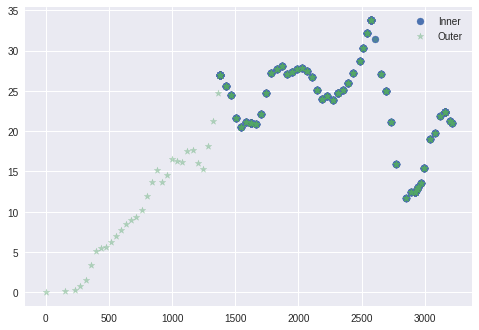

In [31]:
plt.scatter(df_inner["DEPT"],df_inner["incl"],label="Inner")
plt.scatter(df_outer["DEPT"],df_outer["incl"],label="Outer",alpha=.4,marker="*")
plt.legend()
plt.show()

In [32]:
fig = px.scatter_3d(df_outer ,df_outer["dispEw"],df_outer["dispNs"], df_outer["tvd"],color = "incl")

fig.update_scenes(zaxis_autorange = "reversed")
fig.show()

In [33]:
fig = px.scatter_3d(df_outer.dropna(subset=["Stick_RT"]) ,df_outer.dropna(subset=["Stick_RT"])["dispEw"],df_outer.dropna(subset=["Stick_RT"])["dispNs"], df_outer.dropna(subset=["Stick_RT"])["tvd"] ,color = "Stick_RT")

fig.update_scenes(zaxis_autorange = "reversed")
fig.show()

In [39]:
df_outer.dropna(subset=["Stick_RT","incl"],inplace=True)

Missing data:


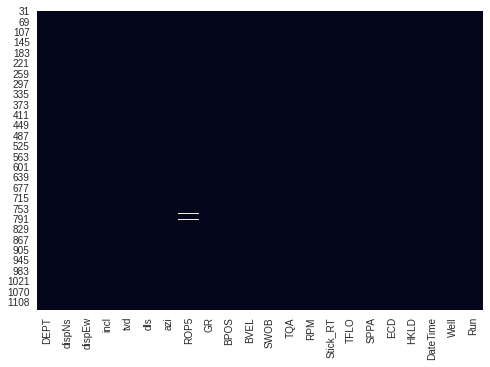

CPU times: user 1.81 s, sys: 104 ms, total: 1.92 s
Wall time: 2.01 s


In [40]:
%%time
print("Missing data:")
sns.heatmap(df_outer.isnull(), cbar=False)
plt.xlabel("")
plt.show()

In [42]:
df_outer.to_csv(r"WellboreF15A_Incl.csv",index=False)